# Investigate effect of backprop

In [40]:
import os
import pandas as pd

In [41]:
experiments_dir = "../experiments_backprop_improvement/"
files = [f for f in os.listdir(experiments_dir) if os.path.isfile(experiments_dir + f)]
data = []
for i, f in enumerate(files):
    data.append(pd.read_csv(experiments_dir + f))

In [42]:
k = []
zeros = []


for i in range(10):
    zeros.append([])
    k.append([])
    for d in data:
        gen_i = d[d["generation"] == i]
        k[i].append(gen_i)
        zeros[i].append(gen_i[gen_i[" diff_after_backprop"] == 0].shape[0])
    k[i] = pd.concat(k[i])

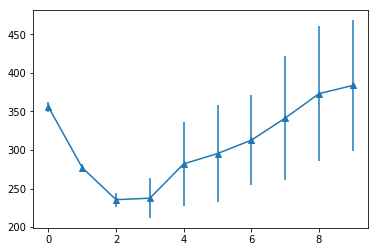

In [43]:
from statistics import mean, stdev
from plot import errorbar_plot

values = [(i, (mean(z), stdev(z))) for i, z in enumerate(zeros)]

errorbar_plot(values)

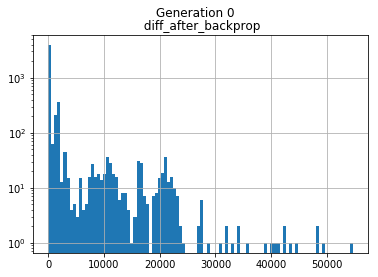

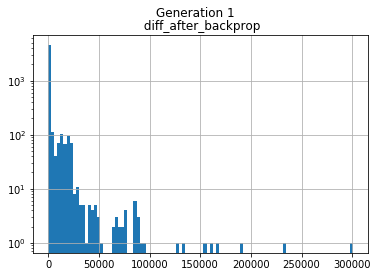

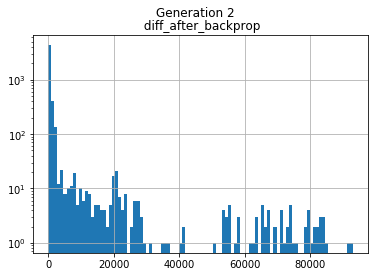

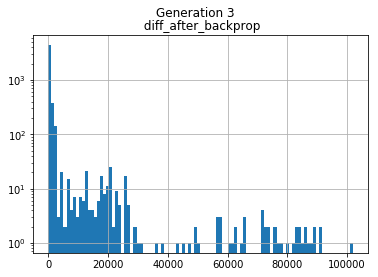

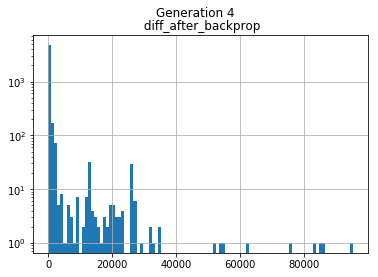

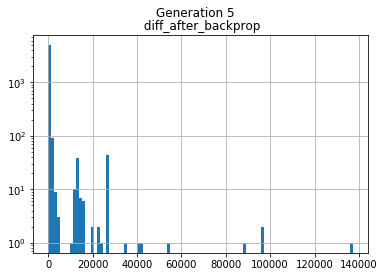

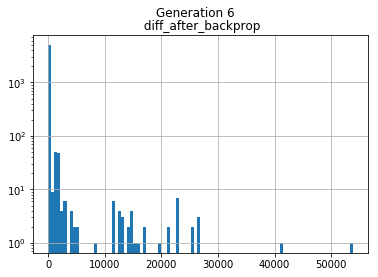

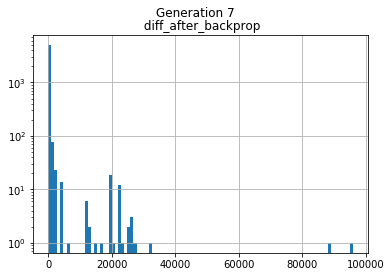

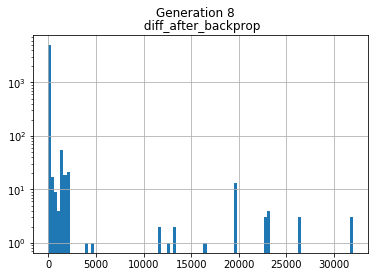

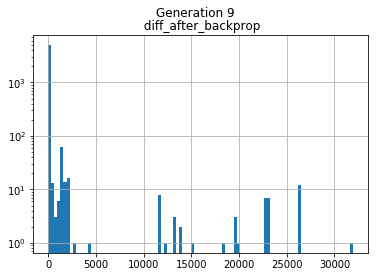

In [60]:
import matplotlib.pyplot as plt
import pylab as pl

for i in range(len(k)):

    
    df = k[i][k[i][" diff_after_backprop"] >= 0]
    p = df.hist(column=" diff_after_backprop", bins = 100, log = True)
    pl.suptitle("Generation " + str(i))
    plt.show()